1.数据了解/查看

2.数据清洗和填充

3.Baseline的机器学习

4.EDA+特征工程

5.机器学习的调优(XGBoostClassifier)

6.其他的分类模型(RT,LR,SVM...)

7.Stacking集成

8.模型评测(PR/Fscore/ROC)


In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
train=pd.read_csv('data.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 空值填充

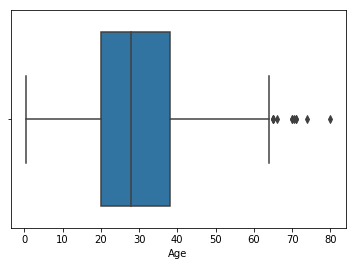

In [4]:
# 年龄填充
sns.boxplot(train['Age']) #年龄分布

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


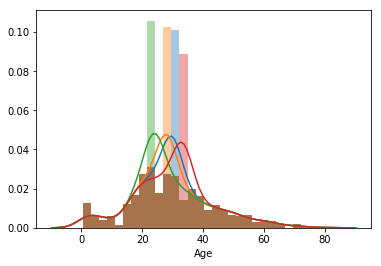

In [5]:
### Age的填充
sns.distplot(train['Age'].fillna(train['Age'].mean())) #蓝
sns.distplot(train['Age'].fillna(train['Age'].median())) #黄
sns.distplot(train['Age'].fillna(train['Age'].mode()[0])) #绿
sns.distplot(train['Age'].fillna(np.random.normal(train['Age'].mean(),train['Age'].std()))) #正太分布填充 红

In [6]:
train['Age']=train['Age'].fillna(train['Age'].mean())

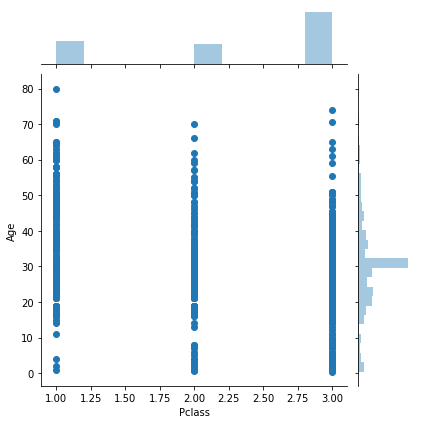

In [7]:
sns.jointplot('Pclass','Age',data=train) #年龄和票类型之间的关系：没有关系

In [9]:
### Embarked的填充
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [10]:
### Cabin的填充
train=train.drop(['Cabin'],axis=1)

### BaselineModel的构建

In [11]:
y=train['Survived']
X=pd.get_dummies(train.drop(['PassengerId','Name','Survived','Ticket'],axis=1))
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
5,3,29.699118,0,0,8.4583,0,1,0,1,0
6,1,54.000000,0,0,51.8625,0,1,0,0,1
7,3,2.000000,3,1,21.0750,0,1,0,0,1
8,3,27.000000,0,2,11.1333,1,0,0,0,1
9,2,14.000000,1,0,30.0708,1,0,1,0,0


In [13]:
### 训练集和评测集的制作
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=123)

### 训练
import xgboost as xgb
xgclass=xgb.XGBClassifier()
xgclass.fit(X_train,y_train)
preds=xgclass.predict(X_test)
accuracy=(preds==y_test).sum().astype(float)/len(preds)*100

accuracy

85.47486033519553

### EDA和特征工程

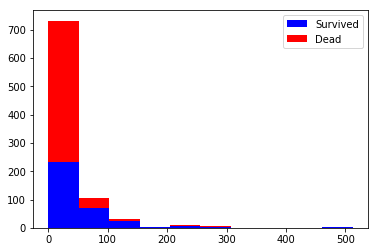

In [17]:
plt.hist(x=[train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']],
        stacked=True, color=['b','r'],label=['Survived','Dead'])
plt.legend()

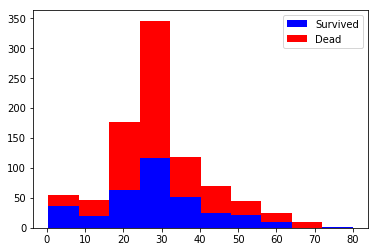

In [18]:
plt.hist(x=[train[train['Survived']==1]['Age'],train[train['Survived']==0]['Age']],
        stacked=True, color=['b','r'],label=['Survived','Dead'])
plt.legend()

女性、有钱人和老人小孩容易活下来

##### 构造家庭人数的特征

In [19]:
train['FamilyNum']=train['SibSp']+train['Parch']+1

In [20]:
train.corr()['Survived']['FamilyNum']

0.01663898928274531

##### 单身属性

In [22]:
train['Alone']=1
train['Alone'].loc[train['FamilyNum']>1]=0  # 没有其他家人就是单身

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


##### 乘客的姓氏

In [23]:
train['Name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0].value_counts() #把姓氏分离出来

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Lady              1
 Sir               1
 Ms                1
 Jonkheer          1
 Don               1
 the Countess      1
 Mme               1
 Capt              1
Name: 0, dtype: int64

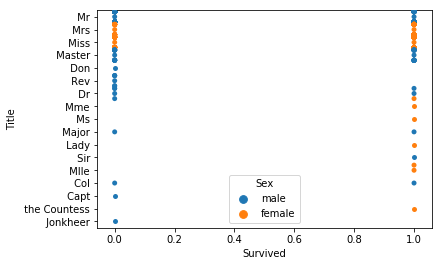

In [24]:
train['Title']=train['Name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0]
sns.swarmplot("Survived","Title",data=train,hue="Sex")

In [25]:
other_titles=(train['Title'].value_counts()<10)
train['Title']=train['Title'].apply(lambda x: 'Other' if  other_titles.loc[x]==True else x)

##### 年龄分段

In [26]:
pd.cut(train['Age'].astype(int),8).value_counts()   # 将年龄分成8个区间

(20.0, 30.0]     408
(30.0, 40.0]     155
(10.0, 20.0]     116
(40.0, 50.0]      84
(-0.08, 10.0]     64
(50.0, 60.0]      42
(60.0, 70.0]      18
(70.0, 80.0]       4
Name: Age, dtype: int64

In [27]:
train['AgeRange']=pd.cut(train['Age'].astype(int),8)

train['AgeRange_Cat']=train['AgeRange'].astype('category')
train['AgeRange_Cat']=train['AgeRange_Cat'].cat.codes

train['AgeRange_Cat']=train['AgeRange_Cat'].astype('str')

##### 阶级切分

In [28]:
pd.qcut(train['Fare'],4).value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare, dtype: int64

In [29]:
train['FareRange']=pd.qcut(train['Fare'],4)

train['FareRange_Cat']=train['FareRange'].astype('category')
train['FareRange_Cat']=train['FareRange_Cat'].cat.codes

train['FareRange_Cat']=train['FareRange_Cat'].astype('str')

##### 所有的categorial属性进行统计

In [33]:
columns=train.columns

for x in columns:
    if train[x].dtype!='float64' and (x not in ['Survived','PassengerId','Name','Ticket']):
        print(x)
        print(x+'的生还率统计')
        print(train[[x,'Survived']].groupby(x).mean())
        print('###'*5)

Pclass
Pclass的生还率统计
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
###############
Sex
Sex的生还率统计
        Survived
Sex             
female  0.742038
male    0.188908
###############
SibSp
SibSp的生还率统计
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
###############
Parch
Parch的生还率统计
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
###############
Embarked
Embarked的生还率统计
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009
###############
FamilyNum
FamilyNum的生还率统计
           Survived
FamilyNum          
1          0.303538
2          0.552795
3          0.578431
4          0.724138
5          0.200000
6          0.136364
7          0.333333
8          0.000000
11         0.000000
###############
Alone
Alone的生还率统计
       Sur

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


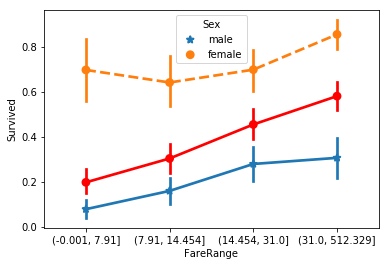

In [34]:
sns.pointplot('FareRange','Survived',data=train,color='r')
sns.pointplot('FareRange','Survived',data=train,hue='Sex',markers=['*','o'],linestyles=['-','--'])

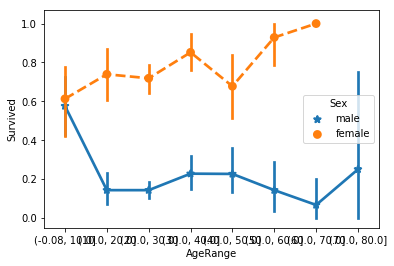

In [36]:
sns.pointplot('AgeRange','Survived',data=train,hue='Sex',markers=['*','o'],linestyles=['-','--'])

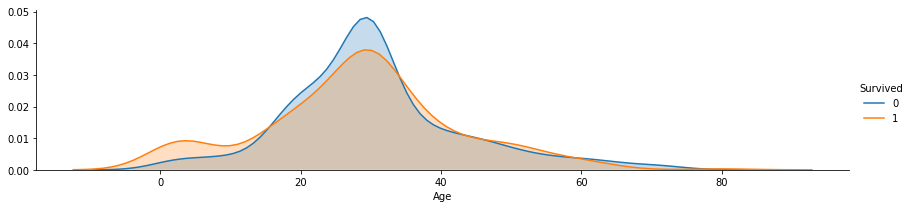

In [38]:
# 生还者与死亡者的年龄分布
a=sns.FacetGrid(train,hue='Survived',aspect=4)
a.map(sns.kdeplot,'Age',shade=True)  # kdeplot是核密度估计图
a.add_legend()

### 算法集成和评估

In [1]:
from sklearn import ensemble
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
?precision_recall_curve

In [75]:
def TrainAndTestByAlgor(train1,alg):
    y=train1['Survived']
    X=pd.get_dummies(train1.drop(['Name','PassengerId','Survived','Ticket'],axis=1))
    X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=123)
    alg.fit(X_train,y_train)
    preds=alg.predict(X_test)
    probas=alg.predict_proba(X_test) # 输出n*k的数组，第i个样本是第j个标签的概率
    
    precision,recall,_=precision_recall_curve(y_test.tolist(),probas_pred=probas[:,1])
    fpr,tpr,_=roc_curve(y_test,probas[:,1])
    auc=roc_auc_score(y_test,probas[:,1])
    ap=average_precision_score(y_test,probas[:,1])
    
    plt.subplot(3,1,1)
    plt.step(recall,precision,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR-Curve with AP:%0.2f'%ap)
   
    plt.subplot(3,1,3)
    plt.step(fpr,tpr,color='r',lw=2)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC with AUC:%0.2f'%auc)
    
    print('With Accuracy')
    print(accuracy_score(y_test,preds))   

In [55]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyNum,Alone,Title,AgeRange,FareRange,AgeRange_Cat,FareRange_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0,Mr,"(20.0, 30.0]","(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0,Mrs,"(30.0, 40.0]","(31.0, 512.329]",3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss,"(20.0, 30.0]","(7.91, 14.454]",2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0,Mrs,"(30.0, 40.0]","(31.0, 512.329]",3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1,Mr,"(30.0, 40.0]","(7.91, 14.454]",3,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,1,1,Mr,"(20.0, 30.0]","(7.91, 14.454]",2,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,1,Mr,"(50.0, 60.0]","(31.0, 512.329]",5,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,5,0,Master,"(-0.08, 10.0]","(14.454, 31.0]",0,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,3,0,Mrs,"(20.0, 30.0]","(7.91, 14.454]",2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,2,0,Mrs,"(10.0, 20.0]","(14.454, 31.0]",1,2


With Accuracy
0.8379888268156425


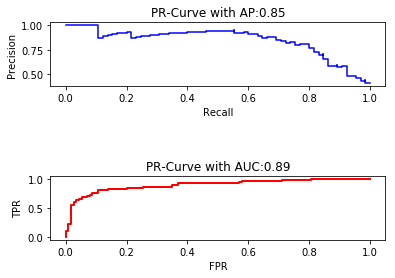

In [76]:
# XGBoost
xgclass=xgb.XGBClassifier(n_estimators=2000,max_depth=4,subsample=0.8,objective="binary:logistic")
TrainAndTestByAlgor(train.drop(['AgeRange','FareRange'],axis=1),xgclass)

With Accuracy
0.88268156424581


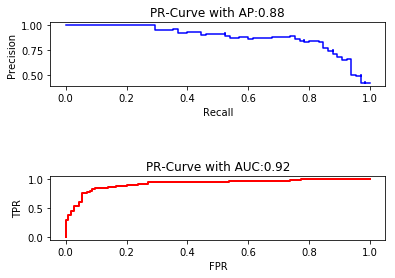

In [77]:
# Adaboost
from sklearn import ensemble
ada_class=ensemble.AdaBoostClassifier(n_estimators=10000,learning_rate=0.1)

TrainAndTestByAlgor(train.drop(['AgeRange','FareRange'],axis=1),ada_class)

With Accuracy
0.8715083798882681


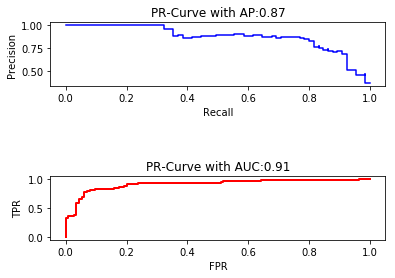

In [79]:
# Bagging
bg_class=ensemble.BaggingClassifier(n_estimators=1000,max_samples=0.4,max_features=0.6)
TrainAndTestByAlgor(train.drop(['AgeRange','FareRange'],axis=1),bg_class)

With Accuracy
0.888268156424581


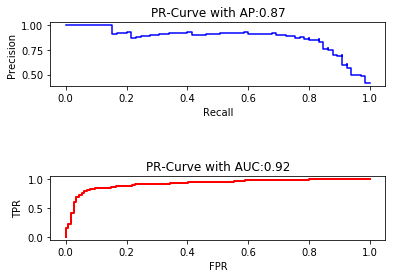

In [80]:
# GBDT
gb_class=ensemble.GradientBoostingClassifier(n_estimators=1000,subsample=0.8)
TrainAndTestByAlgor(train.drop(['AgeRange','FareRange'],axis=1),gb_class)

With Accuracy
0.8603351955307262


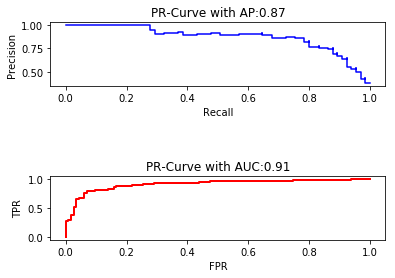

In [81]:
# Random Forest
rf_class=ensemble.RandomForestClassifier(n_estimators=700,max_features=0.9,max_depth=7)
TrainAndTestByAlgor(train.drop(['AgeRange','FareRange'],axis=1),rf_class)

With Accuracy
0.8379888268156425


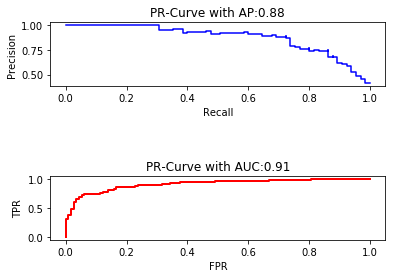

In [83]:
# ExtraTree
et_class=ensemble.ExtraTreesClassifier(n_estimators=700,max_features=0.7,max_depth=7)
TrainAndTestByAlgor(train.drop(['AgeRange','FareRange'],axis=1),et_class)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With Accuracy
0.7486033519553073


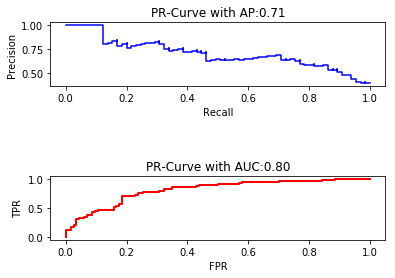

In [85]:
# SVM
from sklearn import svm
svc_class=svm.SVC(probability=True,C=1)
TrainAndTestByAlgor(train.drop(['AgeRange','FareRange'],axis=1),svc_class)

In [4]:
from sklearn.neural_network import MLPClassifier #多层感知器
                    # 牛顿法迭代、迭代最多300次
MLP_class=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(30,40,20),max_iter=300,activation='relu',random_state=123)
?MLP_class

With Accuracy
0.8268156424581006


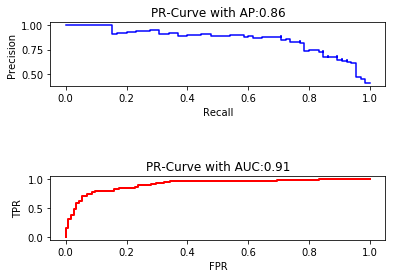

In [86]:
# Neural Network
from sklearn.neural_network import MLPClassifier #多层感知器
                    # solver='lbfgs'表示牛顿法迭代优化、迭代最多300次，正则化参数alpha=1e-5
MLP_class=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(30,40,20),max_iter=300,activation='relu',random_state=123)
TrainAndTestByAlgor(train.drop(['AgeRange','FareRange'],axis=1),MLP_class)

### Cross-Validate 进行算法分析

In [90]:
from sklearn import linear_model

MLA_collection=[
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    linear_model.LogisticRegressionCV(),
    svm.SVC(probability=True),
    xgb.XGBClassifier(),
    MLPClassifier(),
]

cv_split=model_selection.ShuffleSplit(n_splits=10,train_size=0.8,test_size=0.2,random_state=123)

MLA_Columns=['MLA Name','MLA Parameters','MLA Train Accu Mean','MLA Test Accu Mean','MLA Test Accu STD','MLA Time']
MLA_Compare=pd.DataFrame(columns=MLA_Columns)  #构建算法比较矩阵

row_index=0
for alg in MLA_collection:
    MLA_name=alg.__class__.__name__  #为什么这个特殊？MLA_name不用填到矩阵里？ 不懂。。。
    MLA_Compare.loc[row_index,'MLA Name']=MLA_name
    MLA_Compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv  = cv_split)
    MLA_Compare.loc[row_index, 'MLA Train Accu Mean'] = cv_results['train_score'].mean()
    MLA_Compare.loc[row_index, 'MLA Test Accu Mean'] = cv_results['test_score'].mean()
    MLA_Compare.loc[row_index, 'MLA Test Accu STD']=cv_results['test_score'].std()
    MLA_Compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    row_index+=1
    
MLA_Compare

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

,MLA Name,MLA Parameters,MLA Train Accu Mean,MLA Test Accu Mean,MLA Test Accu STD,MLA Time
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.835501,0.794406,0.0240624,0.0481741
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.964675,0.78042,0.0379431,0.0123022
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.984183,0.782517,0.0287395,0.0107924
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.908612,0.818881,0.0253008,0.0740941
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.971178,0.779021,0.0340007,0.0120885
5,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.793497,0.783217,0.0156368,0.339273
6,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.89754,0.704895,0.0327703,0.0681365
7,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.882425,0.811189,0.0329489,0.0298225
8,MLPClassifier,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.824077,0.799301,0.028155,0.604603


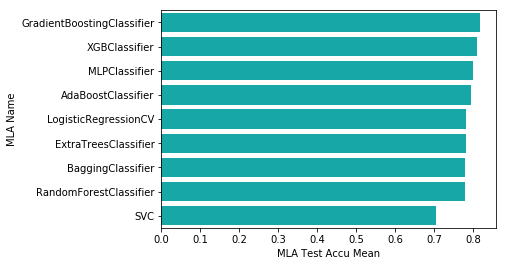

In [97]:
sns.barplot(x='MLA Test Accu Mean',y='MLA Name',data=MLA_Compare.sort_values(by=['MLA Test Accu Mean'],ascending=False),color='c')